# PROJEKTNA NALOGA - TED talks
**Paola Blašković**

V projektni nalogi analiziran je TED talks dataset. Skup podataka TED talks vsebuje podatke o videih zbranihih na strani TED.com v obdobju do 21. septembra 2017.
<img src="TED.png"></img>

 
TED je neprofitna organizacija posvečena širjenju idej. V predavanjima se združuju zamisli s treh različnih področij: tehnologije, zabave in oblikovanja = Technology, Entertainment, Design. TED deluje preko raznolikih mednarodnih pobud in aktivnosti. Na vsakoletni TED konferenci vodilni svetovni misleci in akterji svoje znanje posredujejo v 3 do 18 minut dolgih nastopih. Po dogodku so na TED.com njihovi govori brezplačno dostopni vsakomur.



### Podatki
Skup podatkov vsebuje dve CSV datoteki:

**ted_main.csv** - Vsebuje podatke o TED talk govornikima in TED Talk metadata.

Naziv|Opis|Tip podatka
---|---|---
comments|The number of first level comments made on the talk|Numeric
description|A blurb of what the talk is about|String
duration|The duration of the talk in seconds|Numeric
event|The TED/TEDx event where the talk took place|String
film_date|The Unix timestamp of the filming|Numeric
languages|The number of languages in which the talk is available|Numeric
main_speaker|The first named speaker of the talk|String
name|The official name of the TED Talk. Includes the title and the speaker|String
num_speaker|The number of speakers in the talk|Numeric
published_date|The Unix timestamp for the publication of the talk on TED.com|Numeric
ratings|A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, etc.)|String
related_talks|A list of dictionaries of recommended talks to watch next|String
speaker_occupation|The occupation of the main speaker|String
tags|The themes associated with the talk|String
title|The title of the talk|String
url|The URL of the talk|String
views|The number of views on the talk|Numeric


**transcripts.csv** - Vsebuje prepis in URL povezavo do vsakeg TED videa.

Naziv|Opis|Tip podatka
---|---|---
transcript|The official English transcript of the talk|String
url|The URL of the talk|String




### Prašanja

- Kateri so najbolj najbolj **oceneni** videi? Ali so oni nekako povezani? Ali govorijo o istih temah?
- Ali obstaja povezava med ocenom in številom pogleda videa? 
- Koje so najbolj pogoste **teme** govornikov? 
- Koje teme provociraju največ komentarjev?
- Koliko so v povprečju **dolgi** govori, kateri so bolje oceneni, dolgi ali kratki? 
- Ali obstaja povezava med dolžino in temo videa?
- V katerih mesecih je prikazovano največ videa? Gdaj so posnamljeni najbolj populrani videi? 
- Ali so TED talk-i med saboj nekako povezani? 
- Povezanost okupacije govornika z temo in ratingom pogovorja?

Sigurno je da videi koji so na snimani prije veliko leta bojo imeli več pogledov. Menim da najpogosteje komentirani videi bojo govorili o politiki in znanosti. Verjetno je da v zimskih mesecev videi bodo več pregledani. Verjujem da so videi povezani preko teme in govornika. A okupacija govornika verjetno bo povezana z temo govora. 

## Analiza podatkov

In [58]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import time

In [59]:
cols = ['comments', 'description', 'duration', 'event', 'film_date', 'languages', 'main_speaker', 'name', 'num_speaker', 'published_date', 'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title', 'url', 'views']
ted = pd.read_csv('data/ted_main.csv', sep=',', names=cols, skiprows=1, encoding='utf-8')

t_cols = ['transcript', 'url']
transcripts = pd.read_csv('data/transcripts.csv', sep=',',names=t_cols, skiprows=1, encoding='utf-8')

In [60]:
#ted.views.sort_values(ascending=False)
len(ted)

2550

In [61]:
ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
ted['duration']=ted['duration'].div(60).round(2)

In [63]:
ted.head(10)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.40,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,16.28,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,21.43,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",18.60,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,19.83,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,672,"Tony Robbins discusses the ""invisible forces"" ...",21.75,TED2006,02-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,919,When two young Mormon missionaries knock on Ju...,16.53,TED2006,24-02-2006,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,10-07-2006,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,46,Architect Joshua Prince-Ramus takes the audien...,19.97,TED2006,23-02-2006,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,10-07-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,852,Philosopher Dan Dennett calls for religion -- ...,24.75,TED2006,02-02-2006,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,18-07-2006,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri

### Pregledi videa

In [43]:
max_views = ted[['title', 'main_speaker', 'views']].sort_values('views', ascending=False)[:10]
mean_views = ted['views'].mean()
median_views = ted['views'].median()
print(mean_views)
print(median_views)
max_views

1698297.4815686275
1124523.5


,title,main_speaker,views
0,Do schools kill creativity?,Ken Robinson,47227110
1346,Your body language may shape who you are,Amy Cuddy,43155405
677,How great leaders inspire action,Simon Sinek,34309432
837,The power of vulnerability,Brené Brown,31168150
452,10 things you didn't know about orgasm,Mary Roach,22270883
1776,How to speak so that people want to listen,Julian Treasure,21594632
201,My stroke of insight,Jill Bolte Taylor,21190883
5,Why we do what we do,Tony Robbins,20685401
2114,This is what happens when you reply to spam email,James Veitch,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465


### Število komentara

In [44]:
max_comments = ted[['title', 'main_speaker', 'views', 'comments']].sort_values('comments', ascending=False)[:10]
max_comments

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


In [42]:
ted['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

,comments,duration,languages,num_speaker,views
comments,1.000000,0.140712,0.318284,-0.035489,0.530939
duration,0.140712,1.000000,-0.295687,0.022249,0.048754
languages,0.318284,-0.295687,1.000000,-0.063100,0.377623
num_speaker,-0.035489,0.022249,-0.063100,1.000000,-0.026389
views,0.530939,0.048754,0.377623,-0.026389,1.000000


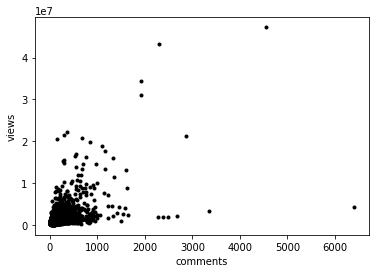

In [56]:
c=ted[['title', 'comments', 'views']]
a=c.loc[:, c.columns[1]]
b=c.loc[:, c.columns[2]]
plt.plot(a,b,"k.")
plt.xlabel('comments')
plt.ylabel('views')

ted.corr(method='pearson')

### Teme TED talka

In [50]:
def clean(word): 
    w = ''
    for ch in word:  
        if ch not in '[]!,.?":;\n\'': 
            w += ch
    return w

cleanTags = []
a=ted.tags
for i in a:
    d = clean(i)
    cleanTags.append(d)
    
tag = []
for t in cleanTags:
    a = t.split(' ')
    for b in a:
        tag.append(b)
    
len(set(tag))
tagsAll=set(tag)
t = {c: tag.count(c) for c in tag}
print (t)

tagsData=pd.DataFrame(list(t.items()), columns=['tags', 'num_tags'])
tagsData

{'children': 143, 'creativity': 189, 'culture': 486, 'dance': 25, 'education': 153, 'parenting': 50, 'teaching': 43, 'alternative': 37, 'energy': 122, 'cars': 29, 'climate': 87, 'change': 305, 'environment': 165, 'global': 565, 'issues': 501, 'science': 675, 'sustainability': 80, 'technology': 727, 'computers': 111, 'entertainment': 299, 'interface': 28, 'design': 526, 'media': 120, 'music': 220, 'performance': 140, 'simplicity': 14, 'software': 45, 'MacArthur': 13, 'grant': 13, 'activism': 157, 'business': 374, 'cities': 123, 'green': 73, 'inequality': 94, 'politics': 128, 'pollution': 39, 'Africa': 105, 'Asia': 26, 'Google': 10, 'demo': 53, 'economics': 187, 'development': 64, 'health': 489, 'math': 57, 'statistics': 28, 'visualizations': 83, 'goal-setting': 36, 'motivation': 63, 'potential': 73, 'psychology': 132, 'Christianity': 6, 'God': 16, 'atheism': 5, 'comedy': 48, 'humor': 105, 'religion': 56, 'storytelling': 120, 'architecture': 82, 'collaboration': 174, 'library': 18, 'TED'

,tags,num_tags
0,children,143
1,creativity,189
2,culture,486
3,dance,25
4,education,153
5,parenting,50
6,teaching,43
7,alternative,37
8,energy,122
9,cars,29


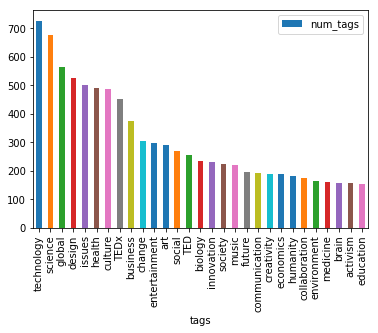

In [56]:
tagsData['num_tags'] = tagsData['num_tags'].astype('int')
td=tagsData.sort_values(by='num_tags', ascending=False)

atleast_150 = tagsData['num_tags'] >= 150
td = tagsData[atleast_150].sort_values(by='num_tags', ascending=False)
td
td.plot(x='tags', y='num_tags', kind='bar')